## Analysis of Funding Received by Start-ups in India from 2018 to 2021

## 1. Business Understanding

     1.1 Project Description

This is analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and recommend the best course of action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to uncover prevailing patterns and gain insights into the opportunities within India's start-up ecosystem to inform decision-making.

     1.2 Type of Problem

This project involves exploratory data analysis (EDA) and visualization. Our goal is to deduce hidden insights and patterns from the available data.


## 2. Data Understanding

We have collected data from various startups in India spanning the years 2018 to 2021, including information on the amounts they received in funding. By analyzing this data, we aim to gain a deeper insight into the startup ecosystem and identify the key contributing factors.


## 3. Data Assumptions

The amounts in the 2019 dataset are all in USD. Please note that the exchange rate for 2018 is \***\*1 USD = 70 INR**.


## 4. Data Analytics questions and Hypthesis


    5 SMART Analytics Questions:

1.  What is the overall trend in funding received by start-ups in India from 2018 to 2021?
2.  Which sectors have received the highest funding during this period?
3.  What is the distribution of startups across the cities in India?
4.  What is the average funding amount received by start-ups in India during this period?
5.  Hypotheses

    Hypothesis 1

**Null Hypothesis (H₀):** There are no significant disparities in funding received by different sectors of Indian startups.

**Alternate Hypothesis (Ha):** The technology sector receives significantly higher funding compared to other industries.

    Hypothesis 2

**Null Hypothesis (H₀):** The location of a startup in a particular city does not influence the amount of funding it receives.

**Alternate Hypothesis (Ha):** The location of a startup in a particular city significantly affects the amount of funding it receives.

    Hypotheses justifications

**Hypothesis 1:** The technology sector is often seen as a high-growth area with substantial investment potential, which may lead to higher funding.

**Hypothesis 2:** Certain cities might have more developed startup ecosystems, better infrastructure, and more active investment communities, which could impact funding amounts.

    Testing Methods

**For Hypothesis 1:** We will use statistical tests like t-tests to compare the average funding amounts across different sectors.

**For Hypothesis 2:** We will use statistical tests such regression analysis to analyze the funding amounts across different cities.


## 5. Data preparation


    5.1 Importing libraries


In [1]:

import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)
from dotenv import dotenv_values # dotenv library to load environment variables

# Lib for data manipulation  analysis  
import pandas as pd
import numpy as np
import sklearn

from sklearn.impute import SimpleImputer

# lib for Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
from prettytable import PrettyTable
# from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

    5.2 Loading datasets


In [2]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')
# Access login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [3]:
#  Credection Connection tesr
connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [4]:
# connect to the server .

con = pyodbc.connect(connection)

In [5]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

# Read data from the  on dataset to the dataframe 
data_2018 = pd.read_csv('dataset\startup_funding2018.csv')
data_2019 = pd.read_csv('dataset\startup_funding2019.csv')
data_2020 = pd.read_sql(query1, con)
data_2021 = pd.read_sql(query2, con)

    5.2.1 Data Overview


In [6]:
# 2018 dataset 
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


let have a data Overview by help of data wrangler


In [7]:
# 2019 dataset 
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [8]:
# 2020 dataset 
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [9]:
# 2021 dataset 
data_2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


Similarities of datasets


In [17]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [18]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [19]:
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [20]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

        5.3 Data Exploration


    5.3.1 2018 Data


5.3.1.1 Data Inspection


![Data 2018 Summary Image](Images\2018DataWrangler1.png)


In [10]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Statistics summary of 2018 data


In [11]:
data_2018.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


From the result summary

- 2018 Data has no Missing values


5.3.1.2 Handling Missing values


start by checking Unique values in each column


In [12]:
def uniqueValue(column): #Industry, Round/Series,Amount, Location and Amount
    return data_2018[column].value_counts()    

In [13]:
#Industry
uniqueValue("Industry")

Industry
—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 405, dtype: int64

In [14]:
uniqueValue("Round/Series")

Round/Series
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                    

In [15]:
uniqueValue("Amount")

Amount
—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: count, Length: 198, dtype: int64

From this information we ave to assume that

- the amount with not current as USD Amount


In [16]:
uniqueValue("Location")

Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

Issue Identified in Data 2018

- **Amount Column** has more that one currency and some has No currency
- **Industry column** has not containd more indust per a company


5.3.1.3 Data cleaning


    Check Duplications


In [17]:

data_2018.duplicated().value_counts()

False    525
True       1
Name: count, dtype: int64

Duplications


In [18]:
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


Dropping data duplicate


In [19]:
# Drop 2018 data duplicates
data_2018 = data_2018.drop_duplicates()

In [20]:
# double check the doublicates again 
data_2018.duplicated().value_counts()

False    525
Name: count, dtype: int64

No duplicate anymore in data 2018


Columns Data types


The `Amount` column is currently classified as a string data type, but it should be represented as an integer. Several issues in this column need to be addressed:

- **Character Removal:** The presence of `,`, `$`, and `₹` characters must be eliminated.
- **Null Values:** The `_` characters, indicating null values, need to be handled appropriately.
- **Currency Standardization:** Amounts in Indian Rupees will be converted to US Dollars to maintain a consistent currency standard.we need ti use our assumption 1 USD = 70rupee based on avarege exchange rate of 2018
- **Data Type Conversion:** Finally, the `Amount` column will be converted to a numeric data type.


In [21]:
# Remove ',' in amount
data_2018['Amount'].replace(',','', regex=True, inplace=True)
data_2018['Amount'].head(15)

0        250000
1     ₹40000000
2     ₹65000000
3       2000000
4             —
5       1600000
6     ₹16000000
7     ₹50000000
8             —
9             —
10            —
11            —
12            —
13            —
14            —
Name: Amount, dtype: object

In [22]:
# A function to convert amount to $ and clean the amount column
def convert_to_usd(amount):
    exchange_rate = 68.4  # Average exchange rate in 2018 to USD: 68.4113 INR.[https://www.exchangerates.org.uk/USD-INR-spot-exchange-rates-history-2018.html]

    if '₹' in str(amount):  #  if  amount is in INR
        amount = (str(amount).replace('₹', ''))  

        return pd.to_numeric(amount, errors='coerce' )/ exchange_rate

    elif '$' in str(amount):

        return  amount.replace('$','')

    elif "—" in str(amount):

        return None  
    else:
        return (amount)

pd.set_option('display.float_format', '{:.1f}'.format)
# Apply the conversion function to the 'Amount' column
data_2018["Amount"] = data_2018["Amount"].apply(convert_to_usd)



In [23]:
data_2018["Amount"]=data_2018["Amount"].astype(float)
data_2018["Amount"].dtype

dtype('float64')

In [24]:
data_2018["Amount"].head(15)


0     250000.0
1     571428.6
2     928571.4
3    2000000.0
4          NaN
5    1600000.0
6     228571.4
7     714285.7
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
Name: Amount, dtype: float64

Based on other data across other 3 datasets which will later make merging easier, `Location` and `Industry` columns will only remain with the first word.


In [25]:
data_2018["Location"].head(10)

0         Bangalore, Karnataka, India
1          Mumbai, Maharashtra, India
2             Gurgaon, Haryana, India
3         Noida, Uttar Pradesh, India
4    Hyderabad, Andhra Pradesh, India
5         Bengaluru, Karnataka, India
6               Kalkaji, Delhi, India
7    Hyderabad, Andhra Pradesh, India
8          Mumbai, Maharashtra, India
9         Bangalore, Karnataka, India
Name: Location, dtype: object

In [26]:
data_2018["Location"] = data_2018["Location"].map(lambda x: x.split(',')[0])
data_2018["Location"].head(10)


0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
5    Bengaluru
6      Kalkaji
7    Hyderabad
8       Mumbai
9    Bangalore
Name: Location, dtype: object

In [27]:
data_2018["Industry"].head(10)

0    Brand Marketing, Event Promotion, Marketing, S...
1                                 Agriculture, Farming
2     Credit, Financial Services, Lending, Marketplace
3                          Financial Services, FinTech
4                   E-Commerce Platforms, Retail, SaaS
5                     Cloud Infrastructure, PaaS, SaaS
6                       Internet, Leisure, Marketplace
7                                      Market Research
8         Information Services, Information Technology
9                                      Mobile Payments
Name: Industry, dtype: object

In [35]:
data_2018["Industry"] = data_2018["Industry"].map(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else x)

data_2018["Industry"].unique().tolist()

['Brand Marketing',
 'Agriculture',
 'Credit',
 'Financial Services',
 'E-Commerce Platforms',
 'Cloud Infrastructure',
 'Internet',
 'Market Research',
 'Information Services',
 'Mobile Payments',
 'B2B',
 'Apps',
 'Food Delivery',
 'Industrial Automation',
 'Automotive',
 'Finance',
 'Accounting',
 'Artificial Intelligence',
 'Internet of Things',
 'Air Transportation',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software',
 'Logistics',
 'Insurance',
 'Information Technology',
 'Blockchain',
 'Education',
 'E-Commerce',
 'Renewable Energy',
 'E-Learning',
 'Clean Energy',
 'Transportation',
 'Fitness',
 'Hospitality',
 'Media and Entertainment',
 'Broadcasting',
 'EdTech',
 'Health Care',
 '—',
 'Sports',
 'Big Data',
 'Cloud Computing',
 'Food Processing',
 'Trading Platform',
 'Consumer Goods',
 'Wellness',
 'Fashion',
 'Consulting',
 'Biotechnology',
 'Communities',
 'Consumer',
 'Consumer Applications',
 'Mobile',
 'Advertising',
 'Marketplace',
 'Aerospace',
 'Ho

From the Unique values, there is a `_` value, let replace it by `Unknown` as the value are categorical data


In [37]:
data_2018["Industry"]=data_2018["Industry"].replace('—', "Unknown", regex=True)

handle missing value


In [31]:
data_2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

Missig value of 28% in column amount is a significant portion, let ` imputing with the median` which a practical approach that prevents data loss while providing a reasonable estimate.


In [38]:
# Statistics summary
data_2018['Amount'].describe().T

count          377.0
mean      17545908.1
std       77875226.2
min            857.1
25%         500000.0
50%        1300000.0
75%        5000000.0
max     1000000000.0
Name: Amount, dtype: float64

In [41]:
# impute null value by median 
# data_2018['Amount'].fillna(data_2018['Amount'].median(), inplace=True)
amount_invested = data_2018["Amount"].values.reshape(-1,1)

imputer = SimpleImputer(strategy="median")

data_2018["Amount"] = imputer.fit_transform(amount_invested)

In [42]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

To make merging and analysis easier, we will add a column called `Year Funded` that contains the year each startup received funding.


In [43]:
data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,525.0,12966109.2,66371626.8,857.1,714285.7,1300000.0,3000000.0,1000000000.0


track the year od fundings by creating colum with 2018 as value


In [44]:
data_2018['Year Funded']= 2018

In [45]:
data_2018.sample(15)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year Funded
146,WheelsEMI,Unknown,Series B,14000000.0,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI...",2018
482,ShareChat,Internet,Series C,99230000.0,Bangalore,ShareChat is a social networking and regional ...,2018
388,Perpule,Apps,Series A,4857142.9,Bangalore,Perpule is a self-checkout product for retail ...,2018
164,Classworks India,Education,Undisclosed,1428.6,Chennai,"Saas, Web App, Mobile App, School Education",2018
418,Medimetry,Health Care,Seed,1300000.0,Haryana,MediMetry is an online platform where patients...,2018
181,Corefactors,Unknown,Seed,1300000.0,Bangalore,"Corefactors is a leading campaign management, ...",2018
228,MY CHIRAAG CAB,Travel,Seed,1000000.0,Jaipur,MY CHIRAAG CAB SERVICES PVT LTD,2018
88,FabAlley,E-Commerce,Series B,8571428.6,Noida,FabAlley is the ultimate Indian fashion destin...,2018
383,Billdesk,Finance,Venture - Series Unknown,1300000.0,Ahmedabad,"BillDesk, a property of IndiaIdeas.com Ltd. wa...",2018
358,The Souled Store,Fashion,Venture - Series Unknown,3000000.0,Mumbai,The Souled Store bring to you awesome t-shirts...,2018


Data Summary after cleaning


![Data 2018 Summary Image](Images\2018DataWrangler2.png)


    5.3.2 2019 Data


![Data 2018 Summary Image](Images\2019beforeCleaning.png)


5.3.2.1 Data Inspection


In [46]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [51]:
data_2019.sample(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
70,Zebu,2015.0,NaN,Cybersecurity,Platform uses encryption technology to allow b...,Team of Waterloo-based software developers,Undisclosed,"$4,000,000",Seed round
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
21,Pristyn Care,2018.0,NaN,Healthcare,Delivers advanced medical care & clinical exce...,"Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garim...","Sequoia India, Hummingbird Ventures, Greenoaks...","$12,000,000",Series B
36,Zetwerk,2018.0,Bangalore,Manufacturing,Provides facilities to get products manufactured.,"Amit Acharya, Srinath Ramakkrushnan","Lightspeed and Greenoaks Capital, Sequoia Indi...","$32,000,000",Series B
48,Box8,2011.0,Mumbai,Foodtech,Enables to order food online,"Amit Raj, Anshul Gupta",Trifecta Capital,"$120,000,000",NaN
35,HappyEasyGo,2017.0,Gurugram,Travel,Online flight booking,"Vivek Prabhakar, Boris Zha","Korea Investment Partners (KIP), Samsung Ventu...","$49,400,000",Series B+
54,Ninjacart,2015.0,NaN,B2B Supply Chain,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",Undisclosed,NaN
64,Moms Co,NaN,New Delhi,E-commerce,It is into mother and baby care-focused consum...,Malika Sadani,"Saama Capital, DSG Consumer Partners","$5,000,000",Series B
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A


5.3.2.2 Data Inspection


Insight from above

- We have 87 Unique companies
- Most columns are string data type excpt Founded column
- We have missing values in Founded 29(33%), Headquarter 19(21%), Sector6(6%), Founders, Stage 46(52%)
- City with most startup in 2019 data is Bnagalore (24%), Mumbai (13%) and Delhi (11%), the missing Values is 21%
- From amount column undisclosed is having 13%


To speed up the data cleaning process, let uses d=function

1. For Descriptive statistics of a variable
2. For Data distribution of a variable (histogram)
3. For Check for missing values in a variable and ploting it


In [92]:
# To find descriptive statistics of ou data
def descriptive_statistics(variable):
    return variable.describe()

# To plot the data distribution of out data using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# To check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# To detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# ploting missing values 
def plot_missing_values_heatmap(df):
    # indicating missing values
    missing_values = df.isnull()

    colors = sns.color_palette(['#FF9933', '#FFFFFF', '#138808'])  # Saffron, White, Green(Indian color) as am working with the data related to India
    # Plotting 
    sns.heatmap(missing_values, cmap=colors)
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()
def check_unique_value_in_column(dataset, column):
    return dataset[column].unique().tolist() 

    

5.3.2.2 Unique values in eacah columns of data


In [93]:
check_unique_value_in_column(data_2019, 'Company/Brand')

['Bombay Shaving',
 'Ruangguru',
 'Eduisfun',
 'HomeLane',
 'Nu Genes',
 'FlytBase',
 'Finly',
 'Kratikal',
 'Quantiphi',
 'Lenskart',
 'Cub McPaws',
 'Appnomic',
 'Kaleidofin',
 'JobSquare',
 'Open Secret',
 'LivFin',
 "Byju's",
 'Zest Money',
 'Witblox',
 'Azah Personal Care Pvt. Ltd.',
 'SalaryFits',
 'Pristyn Care',
 'Springboard',
 'DROR Labs Pvt. Ltd',
 'Medlife',
 'Seekify',
 'Toffee Insurance',
 'Fireflies .ai',
 'HungerBox',
 'Bijak',
 'Licious',
 'truMe',
 'Pumpkart',
 'Asteria Aerospace',
 'Rivigo',
 'HappyEasyGo',
 'Zetwerk',
 'Observe.AI',
 'Freshokartz',
 'Lil’ Goodness and sCool meal',
 'Trell',
 'VMate',
 'Bombay Shirt Company',
 'Slintel',
 'MyGameMate',
 'Afinoz',
 'Rein Games',
 'Ecozen',
 'Box8',
 'Awign Enterprises',
 'Purplle',
 'Freightwalla',
 'TapChief',
 'eJOHRI',
 'Ninjacart',
 'Binca Games',
 'KredX',
 'm.Paani',
 'Origo',
 'WishADish',
 'Ecom Express',
 'Stanza Living',
 'PiBeam',
 'Euler Motors',
 'Moms Co',
 'Cubical Labs',
 'Lawyered',
 'Cuemath',
 'Nive

In [94]:
check_unique_value_in_column(data_2019, 'Founded')


[nan,
 2014.0,
 2004.0,
 2013.0,
 2010.0,
 2018.0,
 2019.0,
 2017.0,
 2011.0,
 2015.0,
 2016.0,
 2012.0,
 2008.0]

In [95]:
check_unique_value_in_column(data_2019, 'HeadQuarter')


[nan,
 'Mumbai',
 'Chennai',
 'Telangana',
 'Pune',
 'Bangalore',
 'Noida',
 'Delhi',
 'Ahmedabad',
 'Gurugram',
 'Haryana',
 'Chandigarh',
 'Jaipur',
 'New Delhi',
 'Surat',
 'Uttar pradesh',
 'Hyderabad',
 'Rajasthan']

In [96]:
check_unique_value_in_column(data_2019, 'Sector')


['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

In [97]:
check_unique_value_in_column(data_2019, 'Founders')



['Shantanu Deshpande',
 'Adamas Belva Syah Devara, Iman Usman.',
 'Jatin Solanki',
 'Srikanth Iyer, Rama Harinath',
 'Narayana Reddy Punyala',
 'Nitin Gupta',
 'Vivek AG, Veekshith C Rai',
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
 'Renuka Ramnath',
 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
 'Abhay Bhat, Kinnar Shah',
 'D Padmanabhan',
 'Puneet Gupta, Sucharita Mukherjee',
 'Ishit Jethwa',
 'Ahana Gautam, Udit Kejriwal',
 'Rakesh Malhotra',
 'Byju Raveendran',
 'Chapman, Priya Sharma, Ashish Anantharaman',
 'Amit Modi',
 'Mohammed, Shashwat Diesh',
 'Renato Araujo',
 'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
 'Gautam Tambay, Parul Gupta',
 'Dhiraj Naubhar, Dheeraj Bansal',
 'Tushar Kumar, Prashant Singh',
 'Arihant Jain, Ajeet Kushwaha',
 'Nishant Jain, Rohan Kumar',
 'Sam Udotong',
 'Sandipan Mitra, Uttam Kumar',
 'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, Daya Rai, Nikhil Tripathi',
 'Vivek Gupta, Abhay Hanjura',
 'Babu Dayal, Pramod Uniyal, L

In [98]:
check_unique_value_in_column(data_2019, 'Investor')


['Sixth Sense Ventures',
 'General Atlantic',
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
 'Innovation in Food and Agriculture (IFA)',
 'Undisclosed',
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
 'Multiples Alternate Asset Management',
 'SoftBank',
 'Venture Catalysts',
 'Avataar Ventures',
 'Oikocredit',
 'Titan Capital',
 'Matrix Partners',
 'German development finance institution DEG',
 'South Africa’s Naspers Ventures, the CPP Investment Board',
 'Goldman Sachs.',
 'Mumbai Angels Network',
 'Kunal Bahl, Rohit Bansal.',
 'Brazilian VC Fund Confrapar',
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
 'Reach Capital',
 'Inflection Point Ventures',
 'Wilson Global Opportunities Fund',
 'Sequoia Capita',
 'IVM Intersurer',
 'Canaan Partners',
 'Paytm, Asian VC fund NPT

In [99]:
check_unique_value_in_column(data_2019, 'Amount($)')


['$6,300,000',
 '$150,000,000',
 '$28,000,000',
 '$30,000,000',
 '$6,000,000',
 'Undisclosed',
 '$1,000,000',
 '$20,000,000',
 '$275,000,000',
 '$22,000,000',
 '$5,000,000',
 '$140,500',
 '$540,000,000',
 '$15,000,000',
 '$182,700',
 '$12,000,000',
 '$11,000,000',
 '$15,500,000',
 '$1,500,000',
 '$5,500,000',
 '$2,500,000',
 '$140,000',
 '$230,000,000',
 '$49,400,000',
 '$32,000,000',
 '$26,000,000',
 '$150,000',
 '$400,000',
 '$2,000,000',
 '$100,000,000',
 '$8,000,000',
 '$100,000',
 '$50,000,000',
 '$120,000,000',
 '$4,000,000',
 '$6,800,000',
 '$36,000,000',
 '$5,700,000',
 '$25,000,000',
 '$600,000',
 '$70,000,000',
 '$60,000,000',
 '$220,000',
 '$2,800,000',
 '$2,100,000',
 '$7,000,000',
 '$311,000,000',
 '$4,800,000',
 '$693,000,000',
 '$33,000,000']

In [100]:
check_unique_value_in_column(data_2019, 'Stage')

[nan,
 'Series C',
 'Fresh funding',
 'Series D',
 'Pre series A',
 'Series A',
 'Series G',
 'Series B',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series E',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A']

Missing Values (Indentifcation, Handling)


Visulazing the Null value in data


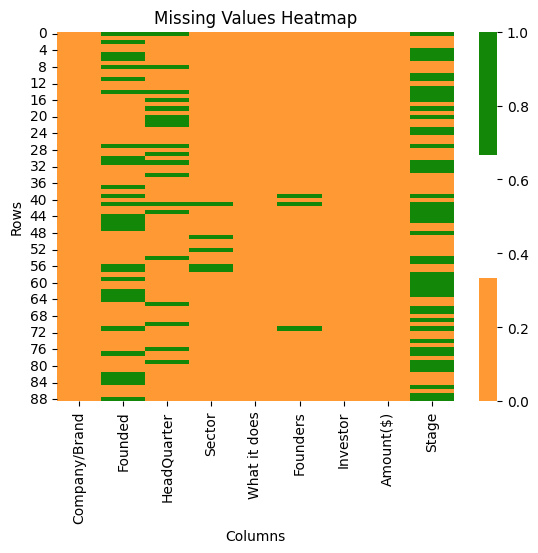

In [102]:
plot_missing_values_heatmap(data_2019)

The `Green` color is showing the missing value in dataset


    Unique values in some column we will use in analysis


Company column


In [104]:
# No missing Values found from the Vizualization

Founded column


In [107]:
# As its contained the null values  let handle by imputting the most frequest year, it

array = data_2019['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')
data_2019['Founded'] = imputer.fit_transform(array)

In [108]:
# Convert the 'dtype to numeric
data_2019['Founded'] = data_2019['Founded'].astype(int)

Headqurter Columns


In [110]:
# Missing Values was found
check_missing_values(data_2019['HeadQuarter'])

0

Handling by replacing by `unknown


In [106]:
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna('Unknown')

Sector Column


In [46]:
data_2019["Sector"].unique().tolist()

['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

This unique values in this column indicate the diverse sectors of service among the start-ups. For better analysis, we will group similar sectors into broader categories.


In [113]:
# Group the sector based on similarity by By creating a dictionary
# The keys in the dictionary are specific sector names as they appear in the dataset.
# The values are the broder categories to which these specific sector names will be mapped to.
sector_mapping = {
    'Ecommerce': 'Ecommerce',
    'Edtech': 'Edtech',
    'Interior design': 'Interior Design',
    'AgriTech': 'AgriTech',
    'Technology': 'Technology',
    'SaaS': 'SaaS',
    'AI & Tech': 'Technology',
    'E-commerce': 'Ecommerce',
    'E-commerce & AR': 'Ecommerce',
    'Fintech': 'Fintech',
    'E-marketplace': 'Ecommerce',
    'Robotics & AI': 'Technology',
    'IoT': 'Technology',
    'Cybersecurity': 'Technology',
    'Virtual Banking': 'Fintech',
    'Banking': 'Fintech',
    'Mutual Funds': 'Fintech',
    'Insurance technology': 'Fintech',
    'HR tech': 'HR Tech',
    'Food tech': 'Food Tech',
    'Foodtech': 'Food Tech',
    'Food': 'Food Tech',
    'Food & Nutrition': 'Food Tech',
    'Food & tech': 'Food Tech',
    'Health': 'Health',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Yoga & wellness': 'Health',
    'Pharmaceutical': 'Health',
    'Safety tech': 'Safety Tech',
    'Logistics': 'Logistics',
    'Travel': 'Travel',
    'Transport & Rentals': 'Travel',
    'Transportation': 'Travel',
    'Accomodation': 'Travel',
    'Manufacturing': 'Manufacturing',
    'Social Media': 'Social Media',
    'E-Sports': 'E-Sports',
    'Cosmetics': 'Cosmetics',
    'B2B': 'B2B',
    'B2B Supply Chain': 'B2B',
    'Jewellery': 'Jewellery',
    'Games': 'Games',
    'Automotive tech': 'Automotive Tech',
    'Automobile': 'Automotive Tech',
    'Automobile & Technology': 'Automotive Tech',
    'Legal tech': 'Legal Tech',
    'Sports': 'Sports',
    'Marketing & Customer loyalty': 'Marketing & Customer Loyalty',
    'Infratech': 'Infratech',
    'Hospitality': 'Hospitality'
}

#  map to the 'Sector' column in the DataFrame
data_2019['Sector'] = data_2019['Sector'].map(sector_mapping)

# Display the updated unique values in the 'Sector' column
data_2019['Sector'].unique().tolist()


['Ecommerce',
 'Edtech',
 'Interior Design',
 'AgriTech',
 'Technology',
 'SaaS',
 'Fintech',
 'HR Tech',
 'Food Tech',
 'Health',
 'Safety Tech',
 nan,
 'Logistics',
 'Travel',
 'Manufacturing',
 'Social Media',
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'Games',
 'Automotive Tech',
 'Legal Tech',
 'Sports',
 'Marketing & Customer Loyalty',
 'Infratech',
 'Hospitality']

Handle Missing Values


In [114]:
data_2019["Sector"] = data_2019["Sector"].fillna('Unknown')

In [115]:
data_2019.sample(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
50,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Goldman Sachs,"$30,000,000",Series C
84,Infra.Market,2015,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
33,Asteria Aerospace,2011,Bangalore,Technology,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,"$230,000,000",NaN
87,Spinny,2015,Delhi,Automotive Tech,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
78,IndyFint,2019,Bangalore,Fintech,It helps lenders to directly provide short-ter...,Paddy Padmanabhan,Saravanan Adiseshan,"$2,100,000",Series A
75,Sportido,2015,Noida,Sports,It is a sports discovery app that helps to fin...,"Neeraj Aggarwala, Akhil Ramachandran","Inflection Point Ventures, SucSEED Venture Par...",Undisclosed,Series B
23,DROR Labs Pvt. Ltd,2018,Delhi,Safety Tech,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,Undisclosed,NaN
83,Froogal,2015,Hyderabad,Marketing & Customer Loyalty,A cloud based Customer Loyalty & Engagement Pl...,"Jeevan Chowdary M, Harshit Harchani",US-based angel investors,"$1,000,000",Pre series A
12,Kaleidofin,2018,Chennai,Fintech,Platform that provides complete financial solu...,"Puneet Gupta, Sucharita Mukherjee",Oikocredit,"$5,000,000",Series A
11,Appnomic,2015,Bangalore,SaaS,"It is a self-healing enterprise, the IT operat...",D Padmanabhan,Avataar Ventures,"$22,000,000",NaN


Investor Column


In [116]:
data_2019["Investor"].unique().tolist()

['Sixth Sense Ventures',
 'General Atlantic',
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
 'Innovation in Food and Agriculture (IFA)',
 'Undisclosed',
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
 'Multiples Alternate Asset Management',
 'SoftBank',
 'Venture Catalysts',
 'Avataar Ventures',
 'Oikocredit',
 'Titan Capital',
 'Matrix Partners',
 'German development finance institution DEG',
 'South Africa’s Naspers Ventures, the CPP Investment Board',
 'Goldman Sachs.',
 'Mumbai Angels Network',
 'Kunal Bahl, Rohit Bansal.',
 'Brazilian VC Fund Confrapar',
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
 'Reach Capital',
 'Inflection Point Ventures',
 'Wilson Global Opportunities Fund',
 'Sequoia Capita',
 'IVM Intersurer',
 'Canaan Partners',
 'Paytm, Asian VC fund NPT

In [117]:
data_2019["Investor"].dtype

dtype('O')

In [118]:
#  No missing values was found in this column


Amount column


Exploring unique value to understand what i need to clean


In [120]:
data_2019['Amount($)'].unique().tolist()

['$6,300,000',
 '$150,000,000',
 '$28,000,000',
 '$30,000,000',
 '$6,000,000',
 'Undisclosed',
 '$1,000,000',
 '$20,000,000',
 '$275,000,000',
 '$22,000,000',
 '$5,000,000',
 '$140,500',
 '$540,000,000',
 '$15,000,000',
 '$182,700',
 '$12,000,000',
 '$11,000,000',
 '$15,500,000',
 '$1,500,000',
 '$5,500,000',
 '$2,500,000',
 '$140,000',
 '$230,000,000',
 '$49,400,000',
 '$32,000,000',
 '$26,000,000',
 '$150,000',
 '$400,000',
 '$2,000,000',
 '$100,000,000',
 '$8,000,000',
 '$100,000',
 '$50,000,000',
 '$120,000,000',
 '$4,000,000',
 '$6,800,000',
 '$36,000,000',
 '$5,700,000',
 '$25,000,000',
 '$600,000',
 '$70,000,000',
 '$60,000,000',
 '$220,000',
 '$2,800,000',
 '$2,100,000',
 '$7,000,000',
 '$311,000,000',
 '$4,800,000',
 '$693,000,000',
 '$33,000,000']

From the summary wher saw that 13% is undisclosed


In [121]:
data_2019['Amount($)'].describe()

count              89
unique             50
top       Undisclosed
freq               12
Name: Amount($), dtype: object

remove $ in amount and converst dtype to numeric


In [122]:
# Remove the dollar sign
data_2019['Amount($)'] = data_2019['Amount($)'].str.replace('$','').replace(',', '', regex=True)

# dtype conversion to numeric
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

Dtype conversion to numeric


In [124]:
data_2019['Amount($)'].dtype

dtype('float64')

Handling Undisclosed values


In [125]:
# let replace undisclosed by null value first
data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)

detectinh and handling the Outlier


In [130]:
Outliers= detect_outliers(data_2019, 'Amount($)')


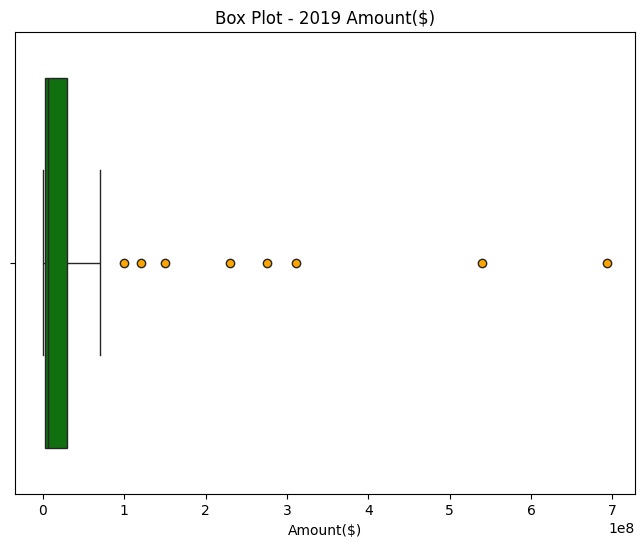

In [133]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'], color='green', flierprops=dict(markerfacecolor='orange'))
plt.title('Box Plot - 2019 Amount($)')
plt.xlabel('Amount($)')
plt.show()

handhle Ourtliers


In [143]:
from sklearn.impute import SimpleImputer

# handle missing value by imputting median strategy
imputer = SimpleImputer(strategy ='median') 

data_2019['Amount($)'] = imputer.fit_transform(data_2019[['Amount($)']])

Outliers Detection and removal in Amount column


In [69]:
detect_outliers(data_2019, 'Amount($)')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Investor Count
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,1
9,Lenskart,2010.0,Delhi,Ecommerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G,1
16,Byju's,2011.0,Unknown,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN,2
33,Asteria Aerospace,2011.0,Bangalore,Technology,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000.0,NaN,1
48,Box8,2011.0,Mumbai,Food Tech,Enables to order food online,"Amit Raj, Anshul Gupta",Trifecta Capital,120000000.0,NaN,1
80,Ola,2010.0,Bangalore,Travel,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",311000000.0,NaN,2
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,3


I have decise to keep the outliers as its the most amount received


In [135]:
# removing outliers:
# data_2019 = data_2019[~data_2019['Amount($)'].isin(outliers['Amount($)'])]

In [134]:
# check again 
# detect_outliers(data_2019, 'Amount($)')

Stage column


In [137]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [138]:
#cleaning Funding round names as categorized based similarity
categorized_stage = {
    "Fresh funding" :"Seed",
    "Seed funding":"Seed",
    "Seed fund" :"Seed",
    "Pre series A": "Pre-series A",
    "Series B+" : "Series B",
    "Seed round" :"Seed"}
data_2019['Stage'] = data_2019['Stage'].replace(categorized_stage)

In [139]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre-series A      9
Series B          9
Seed              4
Series D          4
Series C          3
Series G          1
Post series A     1
Series E          1
Series F          1
Name: count, dtype: int64

Handle Missing Value


the From the Viz, whe notice the missing value


In [140]:
check_missing_values(data_2019['Stage'])

46

In [141]:
data_2019['Stage'] = data_2019['Stage'].fillna('Unknown')

handle the missing value for the Founders columns


In [145]:
data_2019['Founders'] = data_2019['Founders'].fillna('Unknown')

Visualiza again the missing values


No Duplication was found


let keep track the year the investments was received


In [147]:
data_2019['Year Funded'] = 2019

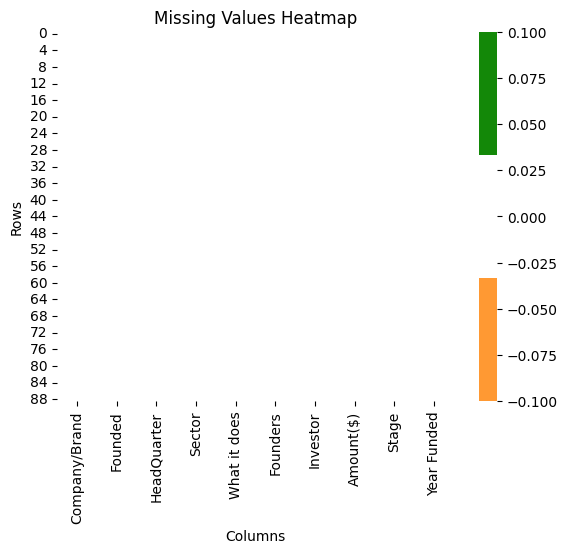

In [149]:
plot_missing_values_heatmap(data_2019)

    5.3.3 Data 2020


![Data 2020 Summary Image](Images\2020beforeCleaning.png)


In [150]:
data_2020

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

Duplicates


In [157]:
data_2020= data_2020.drop_duplicates()

dropping column10


In [ ]:
data_2020= data_2020.drop(['column10'], axis=1)

Missing values


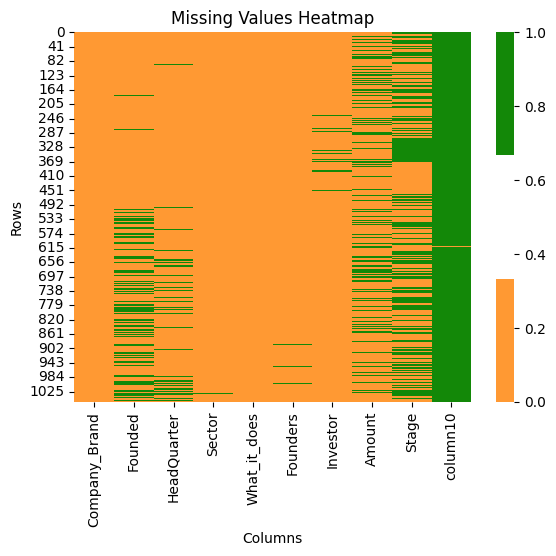

In [153]:
plot_missing_values_heatmap(data_2020)

Founded column


In [156]:
data_2020['Founded'] = data_2020['Founded'].fillna('Uknown')


headQuarter


In [165]:
check_unique_value_in_column(data_2020,'HeadQuarter')


['Chennai',
 'Bangalore',
 'Pune',
 'New Delhi',
 'Indore',
 'Hyderabad',
 'Gurgaon',
 'Belgaum',
 'Noida',
 'Mumbai',
 'Andheri',
 'Jaipur',
 'Ahmedabad',
 'Kolkata',
 'Tirunelveli, Tamilnadu',
 'Thane',
 None,
 'Singapore',
 'Gurugram',
 'Gujarat',
 'Haryana',
 'Kerala',
 'Jodhpur',
 'Jaipur, Rajastan',
 'Delhi',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile-de-France, France',
 'Plano, Texas, United States',
 'Sydney',
 'San Francisco Bay Area, Silicon Valley, West Coast',
 'Bangaldesh',
 'London, England, United Kingdom',
 'Sydney, New South Wales, Australia',
 'Milano, Lombardia, Italy',
 'Palmwoods, Queensland, Australia',
 'France',
 'San Francisco Bay Area, West Coast, Western US',
 'Trivandrum, Kerala, India',
 'Cochin',
 'Samastipur, Bihar',
 'Irvine, California, United States',
 'Tumkur, Karnataka'

From this I can see the headquarter the located outside India, So group them in Outside India category


In [167]:
#  addresses to be mapped to "Outside India"
outside_india_addresses = [
    'San Francisco, California, United States',
    'London, England, United Kingdom',
    'San Francisco Bay Area, Silicon Valley, West Coast',
    'New York, United States',
    'San Francisco, United States',
    'Tangerang, Jawa Barat, Indonesia',
    'San Ramon, California ',
    'Frisco, Texas, United States ',
    'Paris, Ile-de-France, France',
    'Plano, Texas, United States',
    'Palmwoods, Queensland, Australia',
    'France',
    'San Ramon, California',
    'San Francisco Bay Area, West Coast, Western US',
    'Irvine, California, United States',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom',
    'Shanghai, China',
    'Jiaxing, Zhejiang, China',
    'Sydney, New South Wales, Australia',
    'California',
    'Singapore',
    'San Francisco',
    'San Franciscao',
    'Sydney',
    'Bangaldesh',
    'Frisco, Texas, United States',
    'New York',
    'Bangkok',
    'Seattle',
    'Milano, Lombardia, Italy',
    'Seoul',
    'Berlin'
]

for address in outside_india_addresses:
    data_2020.loc[data_2020['HeadQuarter'] == address, 'HeadQuarter'] = 'Outside India'


In [188]:
data_2020['HeadQuarter'].unique

<bound method Series.unique of 0           Chennai
1         Bangalore
2              Pune
3         New Delhi
4            Indore
           ...     
1050          Delhi
1051    Undisclosed
1052         Mumbai
1053          Delhi
1054        Chennai
Name: HeadQuarter, Length: 1052, dtype: object>

replace a 'Undisclosed' with Uknown


In [190]:

data_2020.loc[data_2020['HeadQuarter'] == 'Undisclosed', 'HeadQuarter'] = 'Uknown'

In [174]:
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].map(lambda x: x.split(',')[0] if x is not None else x)

Founders column


In [176]:
# handle misisng value by fill nill null with Uknown keyword
data_2020['Founders'] = data_2020['Founders'].fillna('Uknown')

Amount Column


In [178]:
#Statistical 
data_2020["Amount"].describe()

count           799.0
mean      112699397.5
std      2479695497.0
min           12700.0
25%         1000000.0
50%         3000000.0
75%        11000000.0
max     70000000000.0
Name: Amount, dtype: float64

In [182]:
data_2020["Amount"].unique().tolist()

[200000.0,
 100000.0,
 3000000.0,
 400000.0,
 340000.0,
 600000.0,
 45000000.0,
 1000000.0,
 2000000.0,
 1200000.0,
 660000000.0,
 120000.0,
 7500000.0,
 5000000.0,
 500000.0,
 10000000.0,
 145000000.0,
 100000000.0,
 21000000.0,
 4000000.0,
 20000000.0,
 560000.0,
 275000.0,
 4500000.0,
 15000000.0,
 390000000.0,
 7000000.0,
 5100000.0,
 700000000.0,
 2300000.0,
 700000.0,
 19000000.0,
 9000000.0,
 40000000.0,
 750000.0,
 1500000.0,
 7800000.0,
 50000000.0,
 80000000.0,
 30000000.0,
 1700000.0,
 2500000.0,
 40000.0,
 33000000.0,
 35000000.0,
 300000.0,
 25000000.0,
 3500000.0,
 200000000.0,
 6000000.0,
 1300000.0,
 4100000.0,
 575000.0,
 800000.0,
 28000000.0,
 18000000.0,
 3200000.0,
 900000.0,
 250000.0,
 4700000.0,
 75000000.0,
 8000000.0,
 121000000.0,
 55000000.0,
 3300000.0,
 11000000.0,
 16000000.0,
 5400000.0,
 150000000.0,
 4200000.0,
 22000000.0,
 52000000.0,
 1100000.0,
 118000000.0,
 1600000.0,
 18500000.0,
 70000000000.0,
 800000000.0,
 400000000.0,
 150000.0,
 176000000.

handle Null values


In [179]:
#Imputing missing values in the amount column using simple imputer method
array= data_2020["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data_2020["Amount"]=imputer.fit_transform(array)

stage column


In [ ]:
# Fill the replace null values with 'Uknown' stage
data_2020['Stage'] = data_2020['Stage'].fillna('Unkwon', inplace=True)

In [ ]:
# categorize the stage 
data2020.replace({"Stage": {"Seed Round" : "Seed",
                            "Pre series A": "Pre-series A",
                            "Pre Series A" : "Pre-series A" ,
                            "Seed round" :   "Seed",
                            "Pre seed round" :"Pre-seed",
                            "Series B2" :    "Series B",
                            "Pre series B" : "Pre-series B",
                            "Seed Funding" : "Seed",
                            "Pre-Series B" : "Pre-series B",
                            "Pre-Seed"  :    "Pre-seed",
                            "Seed funding" : "Seed",
                            "Pre-seed Round" :"Pre-seed",
                            "Series E2" :     "Series E",
                            "Pre series A1" : "Pre-series A",
                            "Series D1" :     "Series",
                            "Pre seed Round" :"Pre-seed",
                            "Pre series C"  : "Pre-Series C",
                            "Bridge Round" :  "Bridge",
                            "Series A-1" :    "Series",
                            "Pre- series A":  "Pre-series A",
                            "Seed Investment" :"Seed"}},inplace =True)

track the year of funding


In [184]:
data_2020['Year Funded'] = 2020

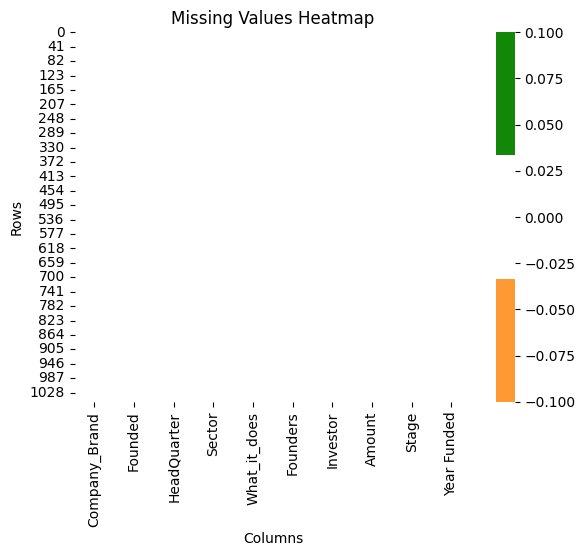

In [191]:
plot_missing_values_heatmap(data_2020)

    5.3.4 Data 2021


columns section for data analysis


In [72]:
# Select the specified columns for analysis
data_2018_selected = data_2018[['Company_Brand','HeadQuarter','Sector','Amount','Stage', 'Year Funded']]
data_2019_selected = data_2019[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year Funded']]
data_2020_selected = data_2020[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year Funded']]
data_2021_selected = data_2021[['Company_Brand','HeadQuarter','Sector','Amount','Stage','Year Funded']]


Combine all datasets into one dataframe combinedData


In [73]:
# concatinate the tables
combinedData= pd.concat([data_2018_selected,data_2019_selected,data_2020_selected,data_2021_selected],ignore_index=True)